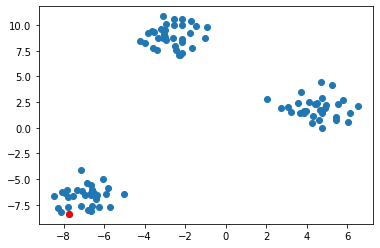

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

## generating data
data, labels = make_blobs(n_samples=100, n_features=2, centers=3, random_state=42)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(data[0, 0], data[0, 1], c='r')
plt.show();

In [2]:
arr_dist = pairwise_distances(data)  # corresponding to the self.arr_dist in the initial code

def select(selected=None, n_selected=10):
    """Select the subset molecules with optimal diversity.
    Algorithm is adapted from https://doi.org/10.1016/S1093-3263(98)80008-9
    """
    if selected is None:
        selected = [0]  # initial_idx is in original code
        return select(selected, n_selected)

    if len(selected) == n_selected:  # if we all selected all n_selected molecules then return list of selected mols
        return selected

    else:
        # calculate min distances from each mol to the selected mols
        min_distances = np.min(arr_dist[selected], axis=0)

        # find molecules distance minimal distance of which is the maximum among all
        new_id = np.argmax(min_distances)

        # add selected molecule to the selected list
        selected.append(new_id)

        # call method again with an updated list of selected molecules
        return select(selected, n_selected)

In [3]:
selected_mols = select(n_selected=9)
print(f"selected_molecules are {selected_mols}, and there classes are {labels[selected_mols]}")

selected_molecules are [0, 94, 3, 50, 64, 85, 93, 83, 34], and there classes are [2 0 1 1 2 0 1 2 0]


## Visualisation

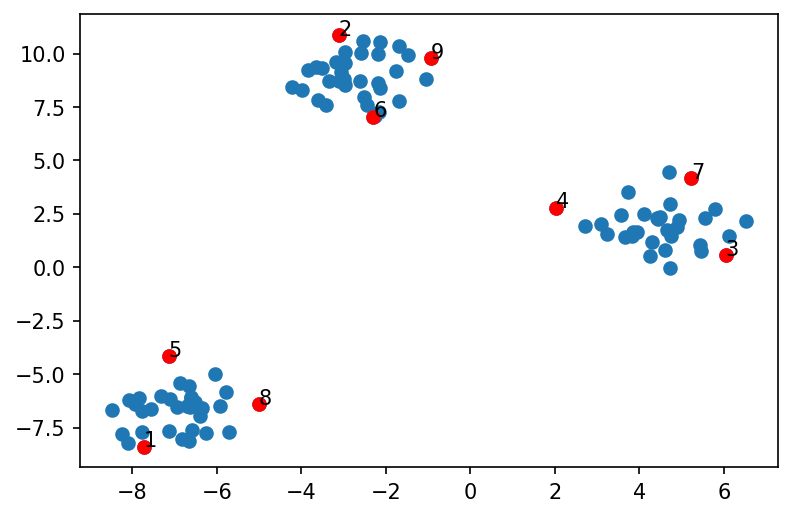

In [4]:
plt.figure(dpi=150)
plt.scatter(data[:, 0], data[:, 1])

for i, mol_id in enumerate(selected_mols):
    plt.scatter(data[mol_id, 0], data[mol_id, 1], c='r')
    plt.text(data[mol_id,0], data[mol_id, 1], str(i+1))
    
plt.show();